
## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All problems **MUST** be solved.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

A role of a job-agency, which receives thousands of resumes every month, but does not have time to classify these.
Resumes come in, but we don't know exactly how these should be assigned. Is this applicant an engineer, HR or warehouse worker?
You are expected to help in reading the resumes and provide a revision for all of them about the position, experience, skills, courses …. In a data frame and then doing some analysis.


## <span style="color:blue">Data Description

Context
    
A collection of Resume Examples taken from livecareer.com for categorizing a given resume into any of the labels defined in the dataset.
    
Content
    
Contains 2400+ Resumes in string as well as PDF format.
PDF stored in the data folder differentiated into their respective labels as folders with each resume residing inside the folder in pdf form with filename as the id defined in the csv.
Inside the CSV:

- ID: Unique identifier and file name for the respective pdf.

- Resume_str : Contains the resume text only in string format.

- Resume_str : Contains the resume text only in string format.

- Category : Category of the job the resume was used to apply.

    Present categories are
HR, Designer, Information-Technology, Teacher, Advocate, Business-Development, Healthcare, Fitness, Agriculture, BPO, Sales, Consultant, Digital-Media, Automobile, Chef, Finance, Apparel, Engineering, Accountant, Construction, Public-Relations, Banking, Arts, Aviation


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- POSITION_TITLE: Job title.
- resume number: the Id of resume that it was saved as
- QUALIFICATIONS: The qualifications that each applicant had for the job
- EDUCATION _TYPE: type of education that the applicant had (master, bachelor, diploma….)
- SCHOOL_TYPE: The type of school the applicant study in (university, college, high school)
- EDUCATION_MAJOR: The education major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job.
- AWORDS: If the applicant had an award or not.
- COMMUNITY SERVICE: If the applicant had a community service work or not.
- VOLUNTEERING: If the applicant had any volunteering or not.
- DRIVERS_LICENSE_AVAILABILITY: Is driver license available or not for this applicant.
- SKILLS_COUNT: number of skills that the applicant had.
- SKILLS: the skill that applicant had.
- Languages: the number of languages for each applicant.

## <span style='color: Orange'>Processing

#### <span style="color:Yellow">Import Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv('Resume.csv')
df.drop('Resume_html',axis = 1, inplace = True)

# PREPROCESSING THE UNSTRUCTURED RESUMES
# 1. Split Resumes in 'mylist' column
s = df['Resume_str'].apply(lambda x:re.split(r'(\s{7,})', x))
for i in range(len(s)):
    s[i] = [item for item in s[i] if item != '']
    s[i] = list(filter(lambda x: x.strip(), s[i]))
df['mylist'] = s

# 2. Resumes' Titles Extraction and ALL_Titles description
pattern = re.compile(r'([^ ]+\s){0,2}[^ ]+')    #catch the first 3 words at most which is a title in the resume
Resume_Titles = []                              #list of list of keys
for lst in df['mylist']:
    titles = []
    for item in lst:
        match = re.search(pattern, item)
        if match:
            titles.append(match[0].strip())
    Resume_Titles.append(titles)
#each Resume has its own list of keys
Resume_Titles = pd.Series(Resume_Titles)
df['Resume_Titles'] = Resume_Titles
ALL_Titles = pd.Series([item for items in Resume_Titles for item in items]).value_counts() #flatten KEY_WORDS
df.drop('mylist',axis = 1, inplace = True)

# 3. Extract the Main and Common Titles among the Resumes and Save them in TITLES_SET
# ALL_Titles[ALL_Titles.values > 500] #show titles with more than 500 resumes, change 500 to find the other top titles
TITLES_SET = set()
TITLES_SET.add('Skills')
TITLES_SET.add('Education')
TITLES_SET.add('Experience')
TITLES_SET.add('Summary')
TITLES_SET.add('Accomplishments')
TITLES_SET.add('Highlights')
TITLES_SET.add('Professional Summary')
TITLES_SET.add('Education and Training')
TITLES_SET.add('Professional Experience')
TITLES_SET.add('Work History')
TITLES_SET.add('\bCertifications\b')
TITLES_SET.add('Languages')
TITLES_SET.add('Interests')
TITLES_SET.add('Professional Affiliations')
TITLES_SET.add('Additional Information')
TITLES_SET.add('Skill Highlights')
TITLES_SET.add('Affiliations')
TITLES_SET.add('Core Qualifications')
TITLES_SET.add('Executive Profile')
TITLES_SET.add('Work Experience')
TITLES_SET.add('Personal Information')
TITLES_SET.add('Career Overview')
TITLES_SET.add('Core Accomplishments')
TITLES_SET.add('Qualifications')
TITLES_SET.add('Professional Profile')
TITLES_SET.add('Career Focus')
TITLES_SET.add('Profile')
TITLES_SET.add('Activities and Honors')
TITLES_SET.add('Technical Skills')
TITLES_SET.add('Educational Background')
TITLES_SET.add('Executive Summary')
TITLES_SET.add('Core Strengths')
TITLES_SET.add('Relevant Experience')
TITLES_SET.add('Objective')
TITLES_SET.add('Summary of Skills')
TITLES_SET.add('Military Experience')
TITLES_SET.add('Achievements')
TITLES_SET.add('Computer Skills')
TITLES_SET.add('Community Service')
TITLES_SET.add('Professional Overview')
TITLES_SET.add('Awards')
TITLES_SET.add('Licenses')
TITLES_SET.add('communication skills')
TITLES_SET.add('Responsibilities')
TITLES_SET.add('Presentations')
TITLES_SET.add('Publications')
TITLES_SET.add('Technical Skills and Qualifications')
TITLES_SET.add('Skills & Licenses')
TITLES_SET.add('Skills /Interests')
TITLES_SET.add('Skills and Expertise')
TITLES_SET.add('CORE SKILLS')
TITLES_SET.add('HR Skills')
TITLES_SET.add('Summary of Skills')
TITLES_SET.add('Skills Used')
TITLES_SET.add('TECHNOLOGY SKILLS')
TITLES_SET.add('Quantitative skills')
TITLES_SET.add('Professional Skills')
TITLES_SET.add('Knife SKills')
TITLES_SET.add('ADDITIONAL SKILLS AND QUALIFICATIONS')
TITLES_SET.add('Skills')
TITLES_SET.add('Skills and Accomplishments')
TITLES_SET.add('SKILLS AND ACTIVITIES')
TITLES_SET.add('Skills & Qualifications')
TITLES_SET.add('SKILLS / STRENGTHS Computer')
TITLES_SET.add('Key Skills and Management')
TITLES_SET.add('Skills and Education')
TITLES_SET.add('Summary of Skills and Qualifications:.')
TITLES_SET.add('Language Skills')
TITLES_SET.add('skills & core competencies')
TITLES_SET.add('Relevant Skills')
TITLES_SET.add('Technical Skills')
TITLES_SET.add('Skills for Managers')
TITLES_SET.add('Technical Skills and Qualifications')
TITLES_SET.discard('TECHNOLOGY SKILLS')
TITLES_SET.discard('communication skills')
TITLES_SET.discard('SKILLS / STRENGTHS Computer')
TITLES_SET.discard('Knife SKills')
TITLES_SET.discard('Computer Skills')
TITLES_SET.discard('Quantitative skills')
TITLES_SET.discard('HR Skills')
TITLES_SET.discard('Language Skills')
TITLES_SET.discard('Skills for Managers')

# 4. Split Resumes into thier Main Sections
information_v2 = list()
cv_strings = df['Resume_str'].copy()
pattern = '|'.join(map(re.escape, TITLES_SET))
for i in range(len(cv_strings)):
    key_words = re.findall(pattern,cv_strings[i])
    info_dict = dict()
    last_key = 'Position'
    info_dict[last_key] = ''
    start = 0
    for j in range(len(key_words)):
        index = cv_strings[i].find(key_words[j])
        # if i == 2483: print(j,'search for ',key_words[j])
        if key_words[j] != last_key:
            if last_key in info_dict.keys():
                info_dict[last_key] += '    '+cv_strings[i][start:index]
            else: info_dict[last_key] = cv_strings[i][start:index] #once you added the text, delete it from the cv
            cv_strings[i] = cv_strings[i][index:]
            # if i == 2483: print(j,'added: ',last_key,info_dict[last_key])
            last_key = key_words[j]
            start = len(key_words[j])
            # if i == 2483:
            #     print(j,last_key)
            #     print(j,start)
    if last_key in info_dict.keys():
        info_dict[last_key] += '    '+cv_strings[i][start:]
    else: info_dict[last_key] = cv_strings[i][start:]
    for key in info_dict:
        info_dict[key] = info_dict[key].strip()
    information_v2.append(info_dict)
df['CV_SECTIONS_v2'] = pd.Series(information_v2)
sections_count = []
for lst in df['CV_SECTIONS_v2']:
    sections_count.append(len(lst.keys()))
df['sections_count'] = pd.Series(sections_count)
df.drop('Resume_Titles',axis = 1, inplace = True)

# EXTRACTING THE COLUMNS
# 1. Position Title
POSITION_TITLE = df['CV_SECTIONS_v2'].apply(lambda x: x['Position'])
for i in range(len(POSITION_TITLE)):
    if POSITION_TITLE[i] == '':
        POSITION_TITLE[i] = 'other'
df['POSITION_TITLE'] = POSITION_TITLE

# 2. Experience Length
EXPERIENCE_LENGTH = list()
for resume_dict in df['CV_SECTIONS_v2']:
    experince_years = list()
    length = 0
    for key in resume_dict.keys():
        if 'Experience' in key: #if we found an experinece in the resume
            years = re.finditer(r'(20|19)\d{2}',resume_dict[key])
            for year in years:
                experince_years.append(int(year[0]))
            if len(experince_years) > 0:
                now = re.search(r'current',resume_dict[key])
                if now :
                    length = 2024 - min(experince_years)
                else: length = max(experince_years) - min(experince_years)
    EXPERIENCE_LENGTH.append(length)
df['EXPERIENCE_LENGTH'] = pd.Series(EXPERIENCE_LENGTH)
# remove outliers
df['EXPERIENCE_LENGTH'] = df['EXPERIENCE_LENGTH'].apply(lambda x: df['EXPERIENCE_LENGTH'].median() if x>50 else x)

# 3. Skills & Skills Count
SKILLS_TITLES = [item for item in TITLES_SET if 'skill' in item.lower()]
SKILLS = []
SKILLS_COUNT = []
i = 0
for resume in df['CV_SECTIONS_v2']:
    cv_skills_list = []
    for key in df['CV_SECTIONS_v2'][i].keys():
        if key in SKILLS_TITLES:
            splitted_list = re.split(r'\s{2,}', resume[key])
            if len(splitted_list) <= 2:
                #skills have not in the bullet list format, they are splitted by a comma
                splitted_list = re.split(r', *', df['CV_SECTIONS_v2'][i][key])
            for item in splitted_list:
                item = item.strip(',|.| +')
                if item == '' or item in cv_skills_list:
                    # if the item is a header, empty, or is already in the list: skip it
                    continue
                cv_skills_list.append(item)
    SKILLS.append(cv_skills_list)
    SKILLS_COUNT.append(len(cv_skills_list))
    i += 1
df['SKILLS'] = pd.Series(SKILLS)
df['SKILLS_COUNT'] = pd.Series(SKILLS_COUNT)

# 4. Qualifications
QUALIFICATIONS = []
qualification_titles = set()
for resume in df['CV_SECTIONS_v2']:
    for key in resume.keys():
        if 'qualification' in key.lower():
            qualification_titles.add(key)
highlights = set()
for resume in df['CV_SECTIONS_v2']:
    for key in resume.keys():
        if 'highlight' in key.lower() and 'skill' not in key.lower():
            highlights.add(key)
highlights
accomplishments = set()
for resume in df['CV_SECTIONS_v2']:
    for key in resume.keys():
        if 'accomplishments' in key.lower() and 'skill' not in key.lower():
            accomplishments.add(key)
accomplishments
summary = set()
for resume in df['CV_SECTIONS_v2']:
    for key in resume.keys():
        if 'summary' in key.lower() and 'skill' not in key.lower():
            summary.add(key)
summary
def qualifications_found(index,keys,titles):
    for key in keys:
        for title in titles:
            if title in key:
                QUALIFICATIONS.append(df['CV_SECTIONS_v2'][index][key])
                return True
    return False
for i in range(len(df['CV_SECTIONS_v2'])):
    if qualifications_found(i,df['CV_SECTIONS_v2'][i].keys(),qualification_titles): continue
    if qualifications_found(i,df['CV_SECTIONS_v2'][i].keys(),highlights): continue
    if qualifications_found(i,df['CV_SECTIONS_v2'][i].keys(),accomplishments): continue
    if qualifications_found(i,df['CV_SECTIONS_v2'][i].keys(),summary): continue
    QUALIFICATIONS.append(df['SKILLS'])
df['QUALIFICATIONS'] = pd.Series(QUALIFICATIONS)

# 5. Awards
pattern = re.compile(r'award (?!.{0,50}program)',re.IGNORECASE)
AWARDS = list()
for i in range(len(df['CV_SECTIONS_v2'])):
    award = False
    for j in df['CV_SECTIONS_v2'][i]:
        match = re.search(pattern,df['CV_SECTIONS_v2'][i][j])
        if j == 'Awards' or 'Honors' in j:
            AWARDS.append('YES')
            award = True
            break
        elif match or 'awarded' in df['CV_SECTIONS_v2'][i][j].lower() or 'prize' in df['CV_SECTIONS_v2'][i][j].lower() or 'won' in df['CV_SECTIONS_v2'][i][j].lower():
            AWARDS.append('YES')
            award = True
            break
    if not award: AWARDS.append('NO')
df['AWARDS'] = pd.Series(AWARDS)

# 6. Education Types
education_types = [
" (Doctorate|PharmD|Ph\.?D\.?|M\.?D\.?|Ed\.?D\.?|MD|DDS|DMD|DVM|LLD|JD|D\.?C\.?|P\.?H\.?|D\.?M\.?|D\.?S\.?|D\.?O\.?|D\.?P\.?|D\.?T\.?|D\.?B\.?A\.?|D\.?B\.?S\.?) "    ,
    " (Master|MBA|MFA|MSW|M\.?A\.?|M\.?S\.?|M\.?Sc|M\.?C\.?|M\.?E\.?|M\.?L\.?|M\.?D\.?|M\.?F\.?|M\.?P\.?) ",
    " (Bachelor|BAS|BFA|BSBA|B\.?A\.?|B\.?S\.?|B\.?Sc|B\.?A|LLB|BBA) ",
    "Certificate",
    "Diploma",
    "Continuing Education"
]
EDUCATION_TYPE = list()
pattern = '|'.join(education_types)
pattern = re.compile(pattern,re.IGNORECASE)
for cv in df['Resume_str']:
    matches = re.search(pattern,cv)
    if matches:
        for type in education_types:
            match = re.search(type,cv)
            if match:
                EDUCATION_TYPE.append(match[0])
                break
    else:
        if "Education" in cv:
            EDUCATION_TYPE.append("Bachelor")
        else:
            EDUCATION_TYPE.append("No Education")
EDUCATION_TYPE = pd.Series(EDUCATION_TYPE)
# mapping types
for i in range(len(EDUCATION_TYPE)):
    # 19
    phd = re.compile(" (Doctorate|PharmD|Ph\.?D\.?|M\.?D\.?|Ed\.?D\.?|MD|DDS|DMD|DVM|LLD|JD|D\.?C\.?|P\.?H\.?|D\.?M\.?|D\.?S\.?|D\.?O\.?|D\.?P\.?|D\.?T\.?|D\.?B\.?A\.?|D\.?B\.?S\.?) ",re.IGNORECASE)
    phd_matches = re.search(phd,EDUCATION_TYPE[i])
    master = re.compile(" (Master|MBA|MFA|MSW|M\.?A\.?|M\.?S\.?|M\.?Sc|M\.?C\.?|M\.?E\.?|M\.?L\.?|M\.?D\.?|M\.?F\.?|M\.?P\.?) ",re.IGNORECASE)
    master_matches = re.search(master,EDUCATION_TYPE[i])
    bachelor = re.compile(" (Bachelor|BAS|BFA|BSBA|B\.?A\.?|B\.?S\.?|B\.?Sc|B\.?A|LLB|BBA) ",re.IGNORECASE)
    bachelor_matches = re.search(bachelor,EDUCATION_TYPE[i])
    if phd_matches:
        EDUCATION_TYPE[i] = 'Doctorate'
    elif master_matches:
        EDUCATION_TYPE[i] = 'Master'
    elif bachelor_matches:
        EDUCATION_TYPE[i] = 'Bachelor'
df['EDUCATION_TYPE'] = pd.Series(EDUCATION_TYPE)

# 7. School Type
school_types = [
    "University",
    "College",
    "High School"
]
SCHOOL_TYPE = list()
pattern = '|'.join(school_types)
for cv in df['Resume_str']:
    for type in school_types:
        match = re.search(type,cv)
        if match:
            SCHOOL_TYPE.append(match[0])
            break
        else:
            SCHOOL_TYPE.append("Not Mentioned")
df['SCHOOL_TYPE'] = pd.Series(SCHOOL_TYPE)

# 8. Languages
languages = ["English", "Mandarin Chinese", "Hindi", "Spanish", "French", "Arabic",
    "Russian", "Bengali", "Portuguese", "Indonesian", "Urdu", "German",
    "Japanese", "Marathi", "Telugu", "Turkish", "Tamil",
    "Punjabi", "Wu", "Korean", "Vietnamese", "Italian", "Yue",
    "Javanese", "Thai", "Gujarati", "Filipino", "Hausa", "Burmese",
    "Persian", "Polish", "Yoruba", "Sindhi", "Odia", "Maithili",
    "Ukrainian", "Igbo", "Uzbek", "Fula", "Amharic", "Hmong",
    "Bhojpuri", "Tagalog", "Farsi",
    "Malay", "Kurdish", "Kinyarwanda", "Sinhala", "Somali", "Bulgarian",
    "Hungarian", "Dutch", "Greek", "Czech", "Swedish", "Danish",
    "Norwegian", "Finnish", "Slovak", "Croatian", "Kazakh", "Malagasy",
    "Lithuanian", "Latvian", "Estonian", "Slovenian", "Albanian", "Mongolian",
    "Serbian", "Tatar", "Turkmen", "Uighur", "Bashkir",
    "Macedonian", "Tajik", "Tswana", "Afrikaans",
    "Belarusian", "Chichewa", "Corsican", "Dzongkha", "Fijian", "Georgian",
    "Haitian Creole", "Hawaiian", "Icelandic",
    "Kannada", "Kashmiri", "Kyrgyz", "Lao", "Luxembourgish", "Malayalam", "Maltese",
    "Maori", "Nepali", "Pashto",
    "Samoan", "Scots Gaelic", "Shona", "Slovak",
    "Sundanese", "Swahili", "Welsh",
    "Xhosa", "Yiddish", "Zulu"
]
for cv in df['Resume_str']:
    lang_list = []
    if any(language in cv for language in languages):
        for language in languages:
            if language in cv:
                lang_list.append(language)
        LANGUAGES.append(count)
    else: LANGUAGES.append(1)
df['LANGUAGES'] = pd.Series(LANGUAGES)

# 9. Community Service
pattern = re.compile(r'community service',re.IGNORECASE)
COMMUNITY_SERVICE = list()
for cv in df['Resume_str']:
    matches = re.search(pattern,cv)
    if matches:
        COMMUNITY_SERVICE.append('YES')
    else:
        COMMUNITY_SERVICE.append("NO")
df['COMMUNITY_SERVICE'] = pd.Series(COMMUNITY_SERVICE)

# 10. Volunteering
pattern = re.compile(r'(Volunteering)|(pro.?bono)',re.IGNORECASE)
VOLUNTEERING = list()
for cv in df['Resume_str']:
    matches = re.search(pattern,cv)
    if matches:
        VOLUNTEERING.append('YES')
    else:
        VOLUNTEERING.append("NO")
df['VOLUNTEERING'] = pd.Series(VOLUNTEERING)

# 11. Driving License
pattern = re.compile(r'([^ \w]\s?(\w+\s)?Driving[^ ])|(Driving Licen[sc]e)',re.IGNORECASE) #reverse engineering
DRIVING_LICENSE = list()
for cv in df['Resume_str']:
    matches = re.search(pattern,cv)
    if matches:
        DRIVING_LICENSE.append('YES')
    else: DRIVING_LICENSE.append('NO')
df['DRIVING_LICENSE'] = pd.Series(DRIVING_LICENSE)

# 12. Majors
majors = {
    "BACHELOR OF ARTS",
    "B.S",
    "MBA",
    "Education",
    "Early Childhood Education",
    "Elementary Education",
    "Secondary Education",
    "Special Education",
    "Curriculum and Instruction",
    "Educational Leadership",
    "Educational Psychology",
    "Sales",
    "Marketing",
    "Business Administration",
    "Management",
    "Retail Management",
    "Communication",
    "Advertising",
    "Finance",
    "Economics",
    "Psychology",
    "Public Relations",
    "Communication",
    "Marketing",
    "Advertising",
    "Journalism",
    "Media Studies",
    "Strategic Communication",
    "Digital Media",
    "Corporate Communication",
    "Event Management",
    "Computer Science",
    "Information Technology",
    "Software Engineering",
    "Computer Engineering",
    "Information Systems",
    "Data Science",
    "Cybersecurity",
    "Networking",
    "Database Management",
    "Web Development",
    "Human Resource Management",
    "Industrial and Labor Relations",
    "Organizational Behavior",
    "Business Administration with a concentration in HR",
    "Psychology with a focus on Industrial-Organizational Psychology",
    "Management with an HR specialization",
    "Public Administration with an emphasis on HR",
    "Labor Studies",
    "Employment Relations",
    "Organizational Leadership",
    "Business Administration",
    "Corporate Communication & Public Relations",
    "Accounting",
    "Finance",
    "Business Administration with a concentration in Accounting",
    "Management Accounting",
    "Taxation",
    "Auditing",
    "Financial Management",
    "Accounting Information Systems",
    "Forensic Accounting",
    "International Accounting",
    "Law",
    "Legal Studies",
    "Political Science",
    "Public Policy",
    "International Relations",
    "Human Rights",
    "Social Work",
    "Community Development",
    "Criminal Justice",
    "Government",
    "Agricultural Economics",
    "Agricultural Education",
    "Agricultural Engineering",
    "Agricultural Science",
    "Agronomy",
    "Animal Science",
    "Crop Science",
    "Environmental Science",
    "Food Science",
    "Horticulture",
    "Soil Science",
    "Apparel Design",
    "Fashion Design",
    "Fashion Merchandising",
    "Textile Design",
    "Textile Engineering",
    "Textile Management",
    "Art History",
    "Fine Arts",
    "Visual Arts",
    "Performing Arts",
    "Music",
    "Dance",
    "Theater",
    "Film Studies",
    "Media Arts",
    "Automobile Engineering",
    "Automotive Technology",
    "Automotive Engineering",
    "Automotive Design",
    "Automotive Management",
    "Automotive Technology Management",
    "Automobile Mechanics",
    "Automobile Marketing",
    "Automobile Manufacturing",
    "Automobile Sales",
    "Automobile Service",
    "Automobile Maintenance",
    "Automobile Design and Technology",
    "Aviation Management",
    "Aviation Administration",
    "Aviation Technology",
    "Aviation Operations",
    "Aviation Science",
    "Aviation Engineering",
    "Aeronautical Engineering",
    "Aerospace Engineering",
    "Air Traffic Control",
    "Pilot Training",
    "Flight Operations",
    "Airport Management",
    "Aircraft Maintenance",
    "Aircraft Systems",
    "Aviation Safety",
    "Aviation Meteorology",
    "Aviation Security",
    "Banking and Finance",
    "Finance",
    "Financial Management",
    "Financial Planning",
    "Investment Banking",
    "Corporate Finance",
    "Accounting and Finance",
    "Financial Economics",
    "Risk Management",
    "Actuarial Science",
    "Economics",
    "Business Administration",
    "Management",
    "Marketing",
    "International Business",
    "Business Administration",
    "Management",
    "Human Resource Management",
    "Information Technology",
    "Computer Science",
    "Software Engineering",
    "Data Science",
    "Operations Management",
    "Logistics Management",
    "Supply Chain Management",
    "Customer Relationship Management",
    "Marketing",
    "Finance",
    "Accounting",
    "Economics",
    "Business Administration",
    "Management",
    "Marketing",
    "Sales",
    "Entrepreneurship",
    "Finance",
    "Economics",
    "International Business",
    "Strategic Management",
    "Organizational Leadership",
    "Business Analytics",
    "Digital Marketing",
    "Supply Chain Management",
    "Project Management",
    "Culinary Arts",
    "Hospitality Management",
    "Food Science",
    "Nutrition",
    "Dietetics",
    "Catering Management",
    "Baking and Pastry Arts",
    "Restaurant Management",
    "Culinary Arts",
    "Culinary Management",
    "Baking and Pastry Arts",
    "Food Preparation",
    "Food Service Management",
    "Gastronomy",
    "Culinary Nutrition",
    "Food and Beverage Management",
    "Hospitality Administration",
    "Culinary Science",
    "Hotel and Restaurant Management",
    "Food Technology",
    "Construction Management",
    "Civil Engineering",
    "Structural Engineering",
    "Architecture",
    "Building Science",
    "Construction Engineering",
    "Construction Technology",
    "Construction Project Management",
    "Surveying",
    "Urban Planning",
    "Environmental Design",
    "Building Construction",
    "Business Administration",
    "Management",
    "Finance",
    "Accounting",
    "Economics",
    "Marketing",
    "Human Resources",
    "Organizational Behavior",
    "Project Management",
    "Strategy",
    "Entrepreneurship",
    "International Business",
    "Graphic Design",
    "Fashion Design",
    "Industrial Design",
    "Interior Design",
    "Architecture",
    "Fine Arts",
    "Visual Communication",
    "Textile Design",
    "Digital Media",
    "Product Design",
    "Digital Media",
    "Digital Arts",
    "Multimedia Design",
    "Animation",
    "Game Design",
    "Web Design",
    "Interactive Media",
    "Film and Media Studies",
    "Communication Design",
    "Visual Effects",
    "Engineering",
    "Mechanical Engineering",
    "Civil Engineering",
    "Electrical Engineering",
    "Chemical Engineering",
    "Computer Engineering",
    "Aerospace Engineering",
    "Biomedical Engineering",
    "Environmental Engineering",
    "Industrial Engineering",
    "Materials Science and Engineering",
    "Nuclear Engineering",
    "Petroleum Engineering",
    "Software Engineering",
    "Finance",
    "Accounting and Finance",
    "Financial Management",
    "Corporate Finance",
    "Investment Banking",
    "Financial Analysis",
    "Financial Planning",
    "Risk Management",
    "International Finance",
    "Economics and Finance",
    "Financial Mathematics",
    "Public Finance",
    "Behavioral Finance",
    "Exercise Science",
    "Kinesiology",
    "Physical Education",
    "Health and Fitness",
    "Fitness Management",
    "Sports Science",
    "Nutrition and Fitness",
    "Health Promotion",
    "Physical Therapy",
    "Athletic Training",
    "Exercise Physiology",
    "Healthcare Administration",
    "Health Sciences",
    "Public Health",
    "Nursing",
    "Healthcare Management",
    "Health Informatics",
    "Health Education",
    "Medical Assisting",
    "Medical Billing and Coding",
    "Radiologic Technology",
    "Medical Laboratory Science",
}
majors.add('Applied Science Secretarial Science')
majors.add('Biology')
majors.add('Machine Drafting Technology')
majors.add('System Design')
majors.add('Republican Art College')
majors.add('Computer Application')
majors.add('B.A')
majors.add('General Studies')
majors.add('Computer Drafting and Design')
majors.add('Medical Assistant')
majors.add('Mathematics')
majors.add('BUSINESS')
majors.add('Bio Technology')
majors.add('Information System')
majors.add('Computer System Engineer')
majors.add('Design Drafting')
majors.add('Information Science & Technology')
majors.add('Chemistry')
majors.add('Bachelor of Science')
majors.add('Medical specalties')
majors.add('Health Administration')
majors.add('Systems Administration/Networks')
majors.add('Child Development')
majors.add('Bachelors of Arts')
majors.add('Environmental Analysis & Design')
majors.add('Science')
majors.add('BASICS')
majors.add('Bachelor of Applied Studies')

MAJOR = []
for resume_sections in df['CV_SECTIONS_v2']:
    found = False
    if 'Education' in resume_sections.keys():
        for item in majors:
            if item.lower() in resume_sections['Education'].lower():
                MAJOR.append(item)
                found = True
                break
        if not found:
            MAJOR.append('other')
    else:
        MAJOR.append('other')
df['MAJOR'] = pd.Series(MAJOR)
df.head()

,ID,Resume_str,Category,CV_SECTIONS_v2,sections_count,POSITION_TITLE,EXPERIENCE_LENGTH,SKILLS,SKILLS_COUNT,QUALIFICATIONS,AWARDS,EDUCATION_TYPE,SCHOOL_TYPE,LANGUAGES,COMMUNITY_SERVICE,VOLUNTEERING,DRIVING_LICENSE,MAJOR
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,{'Position': 'HR ADMINISTRATOR/MARKETING ASSOC...,7,HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...,14.0,"[Accounting, ads, advertising, analytical skil...",36,Focused on customer satisfaction Team managem...,YES,Diploma,Not Mentioned,1,NO,NO,NO,BUSINESS
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,"{'Position': 'HR SPECIALIST, US HR OPERATIONS'...",5,"HR SPECIALIST, US HR OPERATIONS",6.0,"[Adobe Photoshop, ADP, Asset Management, brand...",40,Versatile media professional with background ...,NO,Master,College,1,NO,NO,NO,Communication
2,33176873,HR DIRECTOR Summary Over 2...,HR,"{'Position': 'HR DIRECTOR', 'Summary': 'Over 2...",9,HR DIRECTOR,7.0,"[Recruiting, FMLA/EEO/FLSA, HRIS Development, ...",24,Kansas Health Institute -Health Outcomes for t...,YES,Master,University,1,NO,NO,NO,Science
3,27018550,HR SPECIALIST Summary Dedica...,HR,"{'Position': 'HR SPECIALIST', 'Summary': 'Dedi...",5,HR SPECIALIST,5.0,"[Type 50 wpm and 10-Key by touch, Microsoft pr...",9,"Dedicated, Driven, and Dynamic with over 20 ye...",NO,Certificate,University,1,NO,NO,NO,BUSINESS
4,17812897,HR MANAGER Skill Highlights ...,HR,"{'Position': 'HR MANAGER', 'Skill Highlights':...",6,HR MANAGER,14.0,"[HR SKILLS, HR Department Startup, Three New O...",92,HR SKILLS HR Department Startup Three New Or...,NO,Master,Not Mentioned,1,NO,NO,NO,BUSINESS


###

## <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

### <span style="color:brown">Q1:

Review the number of applicants for each position.

In [ ]:
df.head()

,ID,Resume_str,Category,CV_SECTIONS_v2,sections_count,POSITION_TITLE,EXPERIENCE_LENGTH,SKILLS,SKILLS_COUNT,QUALIFICATIONS,AWARDS,EDUCATION_TYPE,SCHOOL_TYPE,LANGUAGES,COMMUNITY_SERVICE,VOLUNTEERING,DRIVING_LICENSE,MAJOR
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,{'Position': 'HR ADMINISTRATOR/MARKETING ASSOC...,7,HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...,14.0,"[Accounting, ads, advertising, analytical skil...",36,Focused on customer satisfaction Team managem...,YES,Diploma,Not Mentioned,1,NO,NO,NO,BUSINESS
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,"{'Position': 'HR SPECIALIST, US HR OPERATIONS'...",5,"HR SPECIALIST, US HR OPERATIONS",6.0,"[Adobe Photoshop, ADP, Asset Management, brand...",40,Versatile media professional with background ...,NO,Master,College,1,NO,NO,NO,Communication
2,33176873,HR DIRECTOR Summary Over 2...,HR,"{'Position': 'HR DIRECTOR', 'Summary': 'Over 2...",9,HR DIRECTOR,7.0,"[Recruiting, FMLA/EEO/FLSA, HRIS Development, ...",24,Kansas Health Institute -Health Outcomes for t...,YES,Master,University,1,NO,NO,NO,Science
3,27018550,HR SPECIALIST Summary Dedica...,HR,"{'Position': 'HR SPECIALIST', 'Summary': 'Dedi...",5,HR SPECIALIST,5.0,"[Type 50 wpm and 10-Key by touch, Microsoft pr...",9,"Dedicated, Driven, and Dynamic with over 20 ye...",NO,Certificate,University,1,NO,NO,NO,BUSINESS
4,17812897,HR MANAGER Skill Highlights ...,HR,"{'Position': 'HR MANAGER', 'Skill Highlights':...",6,HR MANAGER,14.0,"[HR SKILLS, HR Department Startup, Three New O...",92,HR SKILLS HR Department Startup Three New Or...,NO,Master,Not Mentioned,1,NO,NO,NO,BUSINESS


In [ ]:
applicants_per_position = df['POSITION_TITLE'].value_counts()
len(applicants_per_position[applicants_per_position > 7])

28

In [ ]:
positions_to_replace = applicants_per_position[applicants_per_position <= 7].index
applicants_per_position = df['POSITION_TITLE'].apply(lambda x: 'other' if x in positions_to_replace else x)
applicants_per_position = applicants_per_position.value_counts()
applicants_per_position

POSITION_TITLE
other                                 1961
CONSULTANT                              83
ACCOUNTANT                              56
TEACHER                                 47
SALES ASSOCIATE                         43
SALES                                   28
BUSINESS DEVELOPMENT MANAGER            23
FINANCE MANAGER                         23
EXECUTIVE CHEF                          22
INFORMATION TECHNOLOGY SPECIALIST       14
DIRECTOR OF BUSINESS DEVELOPMENT        14
STAFF ACCOUNTANT                        13
HR GENERALIST                           12
SENIOR ACCOUNTANT                       12
DIRECTOR OF FINANCE                     11
ADMINISTRATIVE ASSISTANT                11
CHEF                                    11
ENGINEERING MANAGER                     11
GRAPHIC DESIGNER                        11
HR MANAGER                              10
SUBSTITUTE TEACHER                       9
ENGINEERING TECHNICIAN                   9
ENGINEERING INTERN                     

### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a specific school type that would guaranteed for their child a good future if you can tell, and which is it ?

In [ ]:
df.head()

,ID,Resume_str,Category,CV_SECTIONS_v2,POSITION_TITLE,EXPERIENCE_LENGTH,AWARDS,SKILLS,SKILLS_COUNT,QUALIFICATIONS,MAJOR,EDUCATION_TYPE,SCHOOL_TYPE,LANGUAGES,COMMYNITY_SERVICE,VOLUNTEERING,DRIVING_LICENSE
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,{'Position': 'HR ADMINISTRATOR/MARKETING ASSOC...,HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...,14.0,YES,"[Accounting, ads, advertising, analytical skil...",36,Focused on customer satisfaction Team managem...,BUSINESS,Diploma,Not Mentioned,1,NO,NO,NO
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,"{'Position': 'HR SPECIALIST, US HR OPERATIONS'...","HR SPECIALIST, US HR OPERATIONS",6.0,NO,"[Adobe Photoshop, ADP, Asset Management, brand...",40,Versatile media professional with background ...,Communication,Master,College,1,NO,NO,NO
2,33176873,HR DIRECTOR Summary Over 2...,HR,"{'Position': 'HR DIRECTOR', 'Summary': 'Over 2...",HR DIRECTOR,7.0,YES,"[Recruiting, FMLA/EEO/FLSA, HRIS Development, ...",24,Kansas Health Institute -Health Outcomes for t...,Science,MS,University,1,NO,NO,NO
3,27018550,HR SPECIALIST Summary Dedica...,HR,"{'Position': 'HR SPECIALIST', 'Summary': 'Dedi...",HR SPECIALIST,5.0,NO,"[Type 50 wpm and 10-Key by touch, Microsoft pr...",9,"Dedicated, Driven, and Dynamic with over 20 ye...",BUSINESS,Certificate,University,1,NO,NO,NO
4,17812897,HR MANAGER Skill Highlights ...,HR,"{'Position': 'HR MANAGER', 'Skill Highlights':...",HR MANAGER,14.0,NO,"[HR SKILLS, HR Department Startup, Three New O...",92,HR SKILLS HR Department Startup Three New Or...,BUSINESS,MS,Not Mentioned,1,NO,NO,NO


a good future may be means the resumes with high experience
lets check the relationship between the experience length with the school type

In [ ]:
df['SCHOOL_TYPE'].value_counts()

SCHOOL_TYPE
University       1082
Not Mentioned    1017
College           272
High School       113
Name: count, dtype: int64

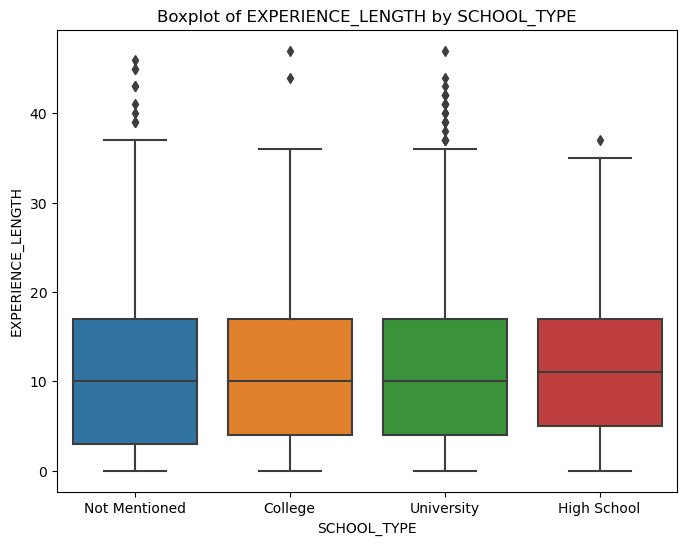

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='SCHOOL_TYPE', y='EXPERIENCE_LENGTH', data=df)
plt.title('Boxplot of EXPERIENCE_LENGTH by SCHOOL_TYPE')
plt.show()

They have the same distributions regardless the school type, so any type is good!

### <span style="color:brown">Q3:

what is the most common skills among all applications?

In [ ]:
### Write you code here ###
skills = pd.Series([item for items in df['SKILLS'] for item in items]).value_counts() # flatten all skills together
skills

Excel                                                                                                                                 352
clients                                                                                                                               301
sales                                                                                                                                 283
policies                                                                                                                              259
client                                                                                                                                246
                                                                                                                                     ... 
Les Mills - GRIT 13                                                                                                                     1
My Yoga classes are fun, inspirati

the most common skill is 'Excel'

### <span style="color:brown">Q4:

Based on the data that you have, could you tell the most active and community helpful applicants are for what position?

we need to study the relationship beteween the position categories and if the person has community service or not

In [ ]:
df.head()

,ID,Resume_str,Category,CV_SECTIONS_v2,POSITION_TITLE,EXPERIENCE_LENGTH,AWARDS,SKILLS,SKILLS_COUNT,QUALIFICATIONS,MAJOR,EDUCATION_TYPE,SCHOOL_TYPE,LANGUAGES,COMMYNITY_SERVICE,VOLUNTEERING,DRIVING_LICENSE
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,{'Position': 'HR ADMINISTRATOR/MARKETING ASSOC...,HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...,14.0,YES,"[Accounting, ads, advertising, analytical skil...",36,Focused on customer satisfaction Team managem...,BUSINESS,Diploma,Not Mentioned,1,NO,NO,NO
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,"{'Position': 'HR SPECIALIST, US HR OPERATIONS'...","HR SPECIALIST, US HR OPERATIONS",6.0,NO,"[Adobe Photoshop, ADP, Asset Management, brand...",40,Versatile media professional with background ...,Communication,Master,College,1,NO,NO,NO
2,33176873,HR DIRECTOR Summary Over 2...,HR,"{'Position': 'HR DIRECTOR', 'Summary': 'Over 2...",HR DIRECTOR,7.0,YES,"[Recruiting, FMLA/EEO/FLSA, HRIS Development, ...",24,Kansas Health Institute -Health Outcomes for t...,Science,MS,University,1,NO,NO,NO
3,27018550,HR SPECIALIST Summary Dedica...,HR,"{'Position': 'HR SPECIALIST', 'Summary': 'Dedi...",HR SPECIALIST,5.0,NO,"[Type 50 wpm and 10-Key by touch, Microsoft pr...",9,"Dedicated, Driven, and Dynamic with over 20 ye...",BUSINESS,Certificate,University,1,NO,NO,NO
4,17812897,HR MANAGER Skill Highlights ...,HR,"{'Position': 'HR MANAGER', 'Skill Highlights':...",HR MANAGER,14.0,NO,"[HR SKILLS, HR Department Startup, Three New O...",92,HR SKILLS HR Department Startup Three New Or...,BUSINESS,MS,Not Mentioned,1,NO,NO,NO


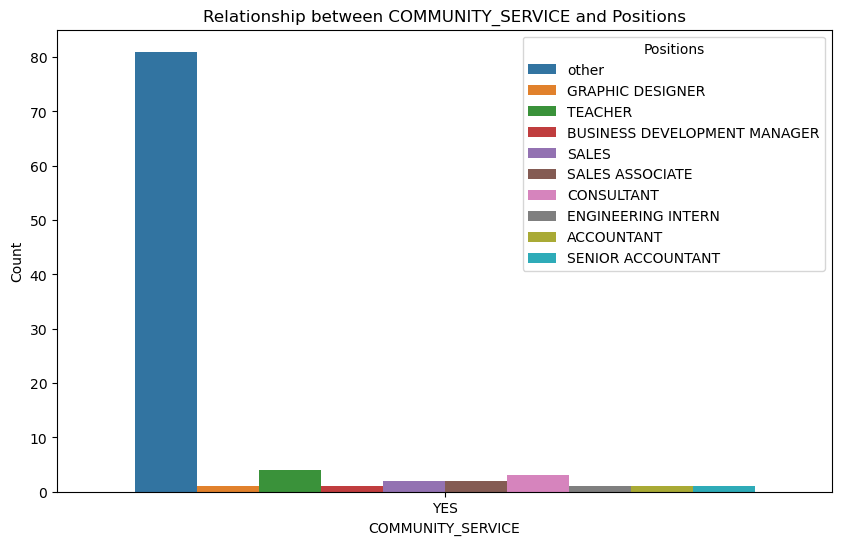

In [ ]:
updated_positions = df['POSITION_TITLE'].apply(lambda x: 'other' if x in positions_to_replace else x)


data = pd.DataFrame({'Positions':updated_positions,'COMMUNITY_SERVICE':df['COMMUNITY_SERVICE']})
data = data[data['COMMUNITY_SERVICE'] == 'YES']

plt.figure(figsize=(10, 6))
sns.countplot(x='COMMUNITY_SERVICE', hue='Positions', data=data)
plt.title('Relationship between COMMUNITY_SERVICE and Positions')
plt.xlabel('COMMUNITY_SERVICE')
plt.ylabel('Count')
plt.show()

if we ignore the other, we can see that the most active position in the community is the 'Teacher' position

### <span style="color:brown">Q5:

could you nominate the best job application for each position?

In [ ]:
df['updated_positions'] = updated_positions

When the job application has more skills I think it is the best job application, so I need to see the relationship between the skills count and the job position

In [ ]:
### Write you code here ###
idx = df.groupby(['updated_positions'])['SKILLS_COUNT'].idxmax()
result = df.loc[idx]
result

,ID,Resume_str,Category,CV_SECTIONS_v2,sections_count,POSITION_TITLE,EXPERIENCE_LENGTH,SKILLS,SKILLS_COUNT,QUALIFICATIONS,AWARDS,EDUCATION_TYPE,SCHOOL_TYPE,LANGUAGES,COMMUNITY_SERVICE,VOLUNTEERING,DRIVING_LICENSE,MAJOR,updated_positions
1819,19545827,ACCOUNTANT Highlights ...,ACCOUNTANT,"{'Position': 'ACCOUNTANT', 'Highlights': '-Sof...",8,ACCOUNTANT,1.0,"[: Public Speaking, Public Relations, Team Bui...",77,-Soft,NO,Bachelor,University,1,NO,NO,NO,Science,ACCOUNTANT
1464,31547476,ADMINISTRATIVE ASSISTANT Care...,CHEF,"{'Position': 'ADMINISTRATIVE ASSISTANT', 'Care...",6,ADMINISTRATIVE ASSISTANT,20.0,"[Microsoft Office (Access, Excel, Outlook, Pow...",43,"Microsoft Office (Access, Excel, Outlook, Powe...",NO,Bachelor,Not Mentioned,1,NO,NO,NO,Science,ADMINISTRATIVE ASSISTANT
634,12377803,BUSINESS DEVELOPMENT MANAGER ...,BUSINESS-DEVELOPMENT,"{'Position': 'BUSINESS DEVELOPMENT MANAGER', '...",6,BUSINESS DEVELOPMENT MANAGER,27.0,"[Clients, Satisfaction, Accounting, Sales, Acc...",51,BUSINESS DEVELOPMENT SKILLS Identify and capi...,NO,Master,University,1,NO,NO,NO,BUSINESS,BUSINESS DEVELOPMENT MANAGER
1362,11121498,CHEF Executive Profile Accom...,CHEF,"{'Position': 'CHEF', 'Executive Profile': 'Acc...",6,CHEF,17.0,[Classically trained chef proficient in all fa...,22,Classically trained chef proficient in all fac...,YES,Bachelor,University,2,NO,NO,NO,Nutrition,CHEF
1172,95429627,CONSULTANT Highlights ...,CONSULTANT,"{'Position': 'CONSULTANT', 'Highlights': 'TECH...",6,CONSULTANT,7.0,"[Annual Sales, Cash, Sales, Sales Of, Inventor...",99,TECHNOLOGY SKILLS Visual Basic * HTML * JavaSc...,YES,Master,Not Mentioned,1,NO,NO,NO,BUSINESS,CONSULTANT
600,29825044,DIRECTOR OF BUSINESS DEVELOPMENT ...,BUSINESS-DEVELOPMENT,{'Position': 'DIRECTOR OF BUSINESS DEVELOPMENT...,9,DIRECTOR OF BUSINESS DEVELOPMENT,19.0,"[Presales and Implementation Support, Developm...",69,"DIRECTOR OF BUSINESS DEVELOPMENT, PRIVACY DATA...",NO,Master,University,1,NO,NO,NO,Science,DIRECTOR OF BUSINESS DEVELOPMENT
1551,12071138,DIRECTOR OF FINANCE Profess...,FINANCE,"{'Position': 'DIRECTOR OF FINANCE', 'Professio...",7,DIRECTOR OF FINANCE,12.0,"[Accounting, computerized accounting, general ...",65,Proficient with various computerized accountin...,NO,Master,Not Mentioned,1,NO,NO,NO,BUSINESS,DIRECTOR OF FINANCE
228,14789139,DIRECTOR OF INFORMATION TECHNOLOGY ...,INFORMATION-TECHNOLOGY,{'Position': 'DIRECTOR OF INFORMATION TECHNOLO...,5,DIRECTOR OF INFORMATION TECHNOLOGY,21.0,"[Academic, Active Directory, ADP, apple, Archi...",85,"0 [Accounting, ads, advertising, analyti...",YES,Master,Not Mentioned,1,NO,NO,NO,Science,DIRECTOR OF INFORMATION TECHNOLOGY
1704,43752620,ENGINEERING INTERN Summary A...,ENGINEERING,"{'Position': 'ENGINEERING INTERN', 'Summary': ...",6,ENGINEERING INTERN,3.0,"[AutoCAD, Ansys, Cero, CATIA, HyperMesh, DFMEA...",48,Automotive Engineer seeking Systems Engineer p...,NO,Bachelor,Not Mentioned,1,NO,NO,NO,Science,ENGINEERING INTERN
1713,81125166,ENGINEERING MANAGER Exp...,ENGINEERING,"{'Position': 'ENGINEERING MANAGER', 'Experienc...",4,ENGINEERING MANAGER,19.0,"[Welding, Automotive, Automotive Cnc, Cnc, Cnc...",100,"0 [Accounting, ads, advertising, analyti...",NO,Master,Not Mentioned,1,NO,NO,NO,B.S,ENGINEERING MANAGER


### <span style="color:brown">Q6:

Do you think learning another language could effect the application, support your opinion.

maybe when a person learns many languages he can learn many other skills more than the others, so I think yes, lets see..

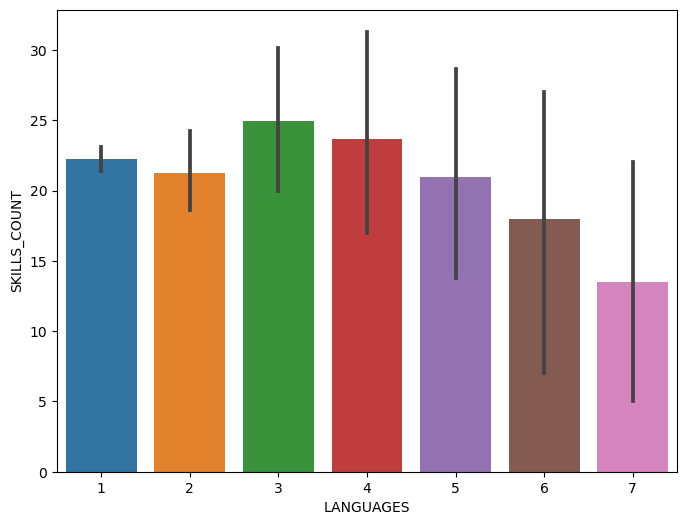

In [ ]:
### Write you code here ###
plt.figure(figsize=(8, 6))
sns.barplot(x = 'LANGUAGES', y = 'SKILLS_COUNT', data = df)
plt.show()

when a person knows 3 languages, he has more skills.. not too much languages is the best niether too many..

### <span style="color:brown">Q7:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

In [ ]:
df.head()

,ID,Resume_str,Category,CV_SECTIONS_v2,POSITION_TITLE,EXPERIENCE_LENGTH,AWARDS,SKILLS,SKILLS_COUNT,QUALIFICATIONS,MAJOR,EDUCATION_TYPE,SCHOOL_TYPE,LANGUAGES,COMMYNITY_SERVICE,VOLUNTEERING,DRIVING_LICENSE,updated_positions
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,{'Position': 'HR ADMINISTRATOR/MARKETING ASSOC...,HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...,14.0,YES,"[Accounting, ads, advertising, analytical skil...",36,Focused on customer satisfaction Team managem...,BUSINESS,Diploma,Not Mentioned,1,NO,NO,NO,Others
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,"{'Position': 'HR SPECIALIST, US HR OPERATIONS'...","HR SPECIALIST, US HR OPERATIONS",6.0,NO,"[Adobe Photoshop, ADP, Asset Management, brand...",40,Versatile media professional with background ...,Communication,Master,College,1,NO,NO,NO,Others
2,33176873,HR DIRECTOR Summary Over 2...,HR,"{'Position': 'HR DIRECTOR', 'Summary': 'Over 2...",HR DIRECTOR,7.0,YES,"[Recruiting, FMLA/EEO/FLSA, HRIS Development, ...",24,Kansas Health Institute -Health Outcomes for t...,Science,Master,University,1,NO,NO,NO,Others
3,27018550,HR SPECIALIST Summary Dedica...,HR,"{'Position': 'HR SPECIALIST', 'Summary': 'Dedi...",HR SPECIALIST,5.0,NO,"[Type 50 wpm and 10-Key by touch, Microsoft pr...",9,"Dedicated, Driven, and Dynamic with over 20 ye...",BUSINESS,Certificate,University,1,NO,NO,NO,Others
4,17812897,HR MANAGER Skill Highlights ...,HR,"{'Position': 'HR MANAGER', 'Skill Highlights':...",HR MANAGER,14.0,NO,"[HR SKILLS, HR Department Startup, Three New O...",92,HR SKILLS HR Department Startup Three New Or...,BUSINESS,Master,Not Mentioned,1,NO,NO,NO,HR MANAGER


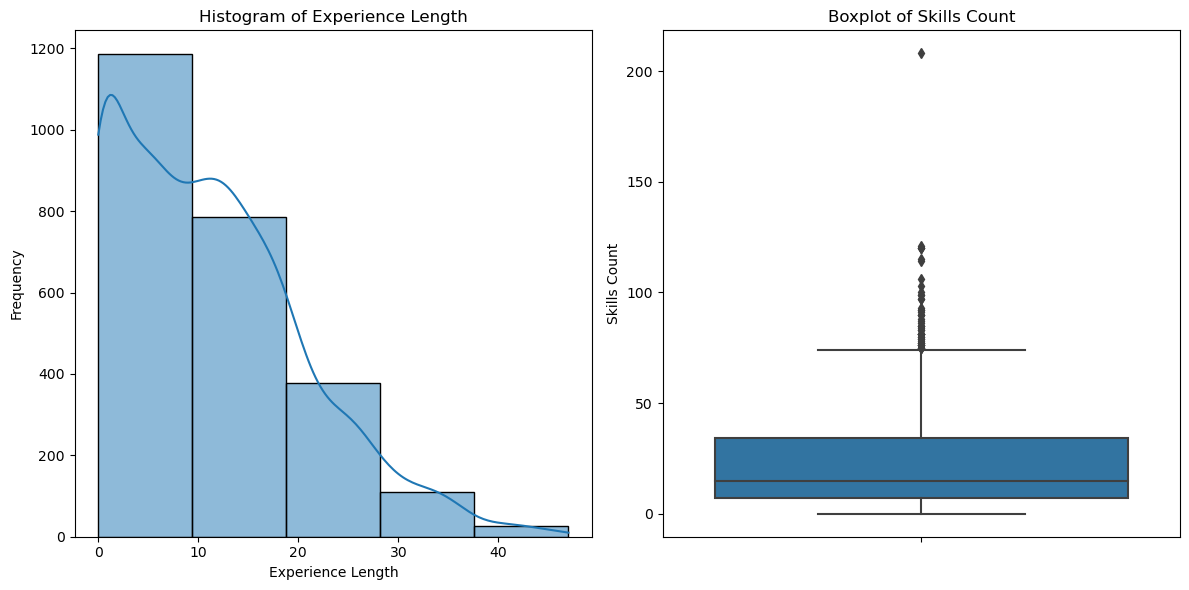

,EXPERIENCE_LENGTH,SKILLS_COUNT
count,2484.000000,2484.000000
mean,11.309984,22.259259
std,9.371367,20.109237
min,0.000000,0.000000
25%,4.000000,7.000000
50%,10.000000,15.000000
75%,17.000000,34.000000
max,47.000000,208.000000


In [ ]:
### Write you code here ###
#note: use_univariate with continouius
continuous_variables = pd.DataFrame({'EXPERIENCE_LENGTH':df['EXPERIENCE_LENGTH'],'SKILLS_COUNT':df['SKILLS_COUNT']})
description = continuous_variables.describe()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['EXPERIENCE_LENGTH'], bins=5, kde=True)
plt.title('Histogram of Experience Length')
plt.xlabel('Experience Length')
plt.ylabel('Frequency')

# Boxplot for Skills_Count
plt.subplot(1, 2, 2)
sns.boxplot(y='SKILLS_COUNT', data=df)
plt.title('Boxplot of Skills Count')
plt.ylabel('Skills Count')

plt.tight_layout()
plt.show()

description

### <span style="color:brown">Q8:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


In [ ]:
majors_count = df['MAJOR'].value_counts()
majors_to_replace = majors_count[majors_count <= 7].index
df['updated_majors'] = df['MAJOR'].apply(lambda x: 'other' if x in majors_to_replace else x)

In [ ]:
df.head()

,ID,Resume_str,Category,CV_SECTIONS_v2,POSITION_TITLE,EXPERIENCE_LENGTH,AWARDS,SKILLS,SKILLS_COUNT,QUALIFICATIONS,MAJOR,EDUCATION_TYPE,SCHOOL_TYPE,LANGUAGES,COMMYNITY_SERVICE,VOLUNTEERING,DRIVING_LICENSE,updated_positions,updated_majors
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,{'Position': 'HR ADMINISTRATOR/MARKETING ASSOC...,HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...,14.0,YES,"[Accounting, ads, advertising, analytical skil...",36,Focused on customer satisfaction Team managem...,BUSINESS,Diploma,Not Mentioned,1,NO,NO,NO,Others,BUSINESS
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,"{'Position': 'HR SPECIALIST, US HR OPERATIONS'...","HR SPECIALIST, US HR OPERATIONS",6.0,NO,"[Adobe Photoshop, ADP, Asset Management, brand...",40,Versatile media professional with background ...,Communication,Master,College,1,NO,NO,NO,Others,Communication
2,33176873,HR DIRECTOR Summary Over 2...,HR,"{'Position': 'HR DIRECTOR', 'Summary': 'Over 2...",HR DIRECTOR,7.0,YES,"[Recruiting, FMLA/EEO/FLSA, HRIS Development, ...",24,Kansas Health Institute -Health Outcomes for t...,Science,Master,University,1,NO,NO,NO,Others,Science
3,27018550,HR SPECIALIST Summary Dedica...,HR,"{'Position': 'HR SPECIALIST', 'Summary': 'Dedi...",HR SPECIALIST,5.0,NO,"[Type 50 wpm and 10-Key by touch, Microsoft pr...",9,"Dedicated, Driven, and Dynamic with over 20 ye...",BUSINESS,Certificate,University,1,NO,NO,NO,Others,BUSINESS
4,17812897,HR MANAGER Skill Highlights ...,HR,"{'Position': 'HR MANAGER', 'Skill Highlights':...",HR MANAGER,14.0,NO,"[HR SKILLS, HR Department Startup, Three New O...",92,HR SKILLS HR Department Startup Three New Or...,BUSINESS,Master,Not Mentioned,1,NO,NO,NO,HR MANAGER,BUSINESS


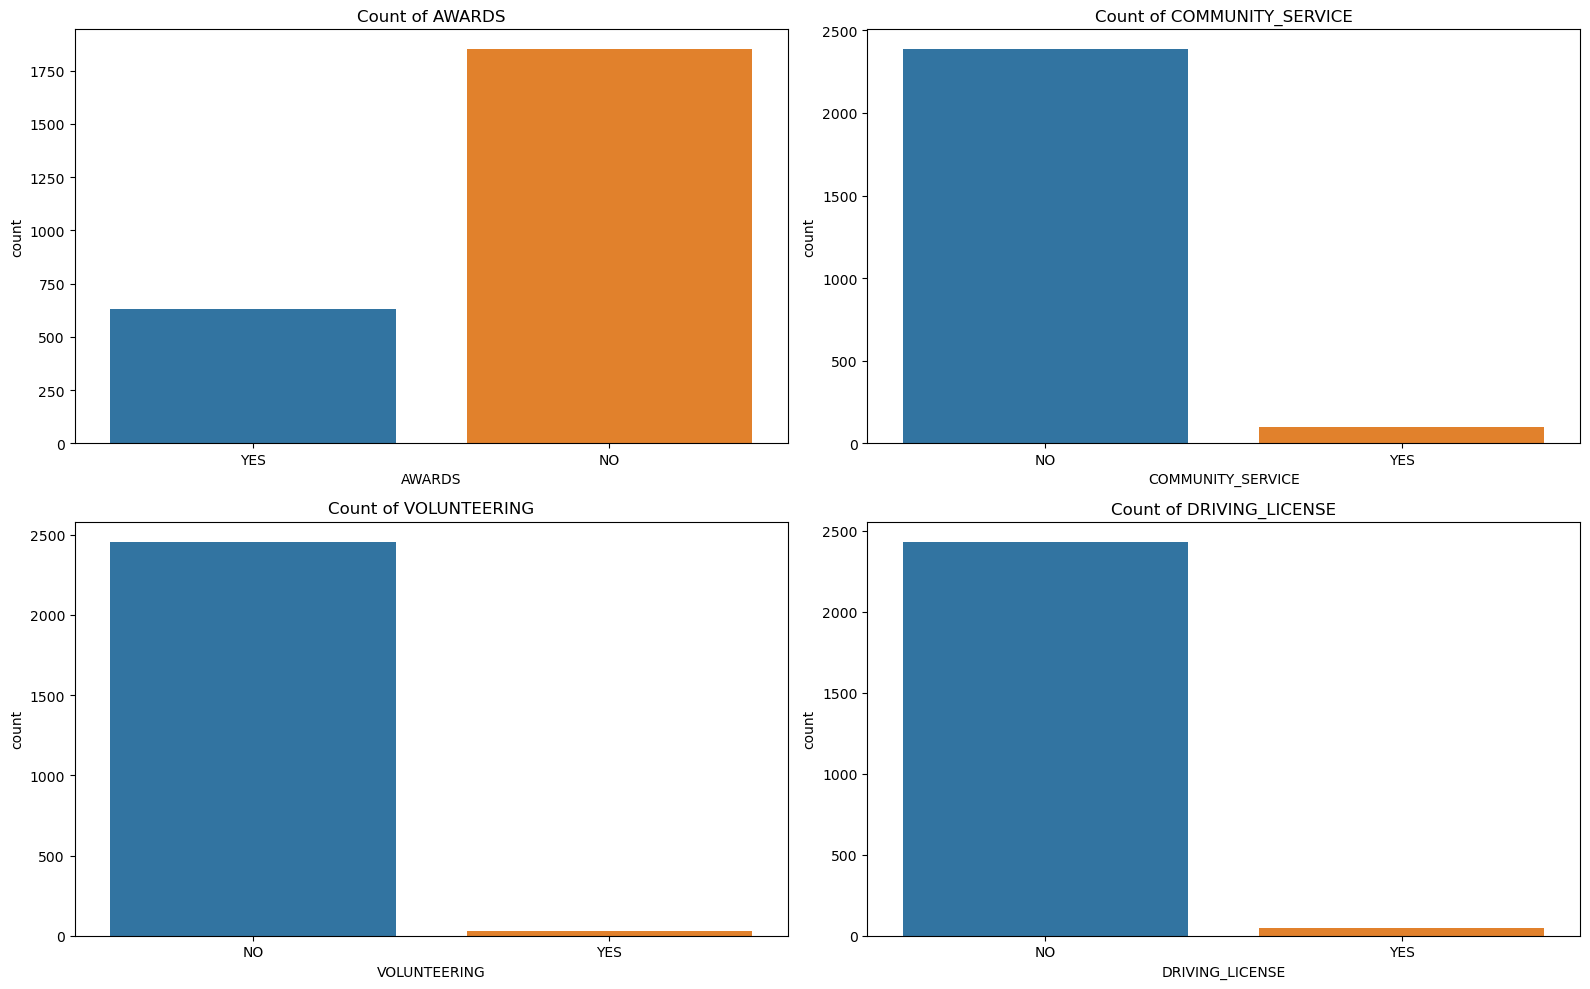

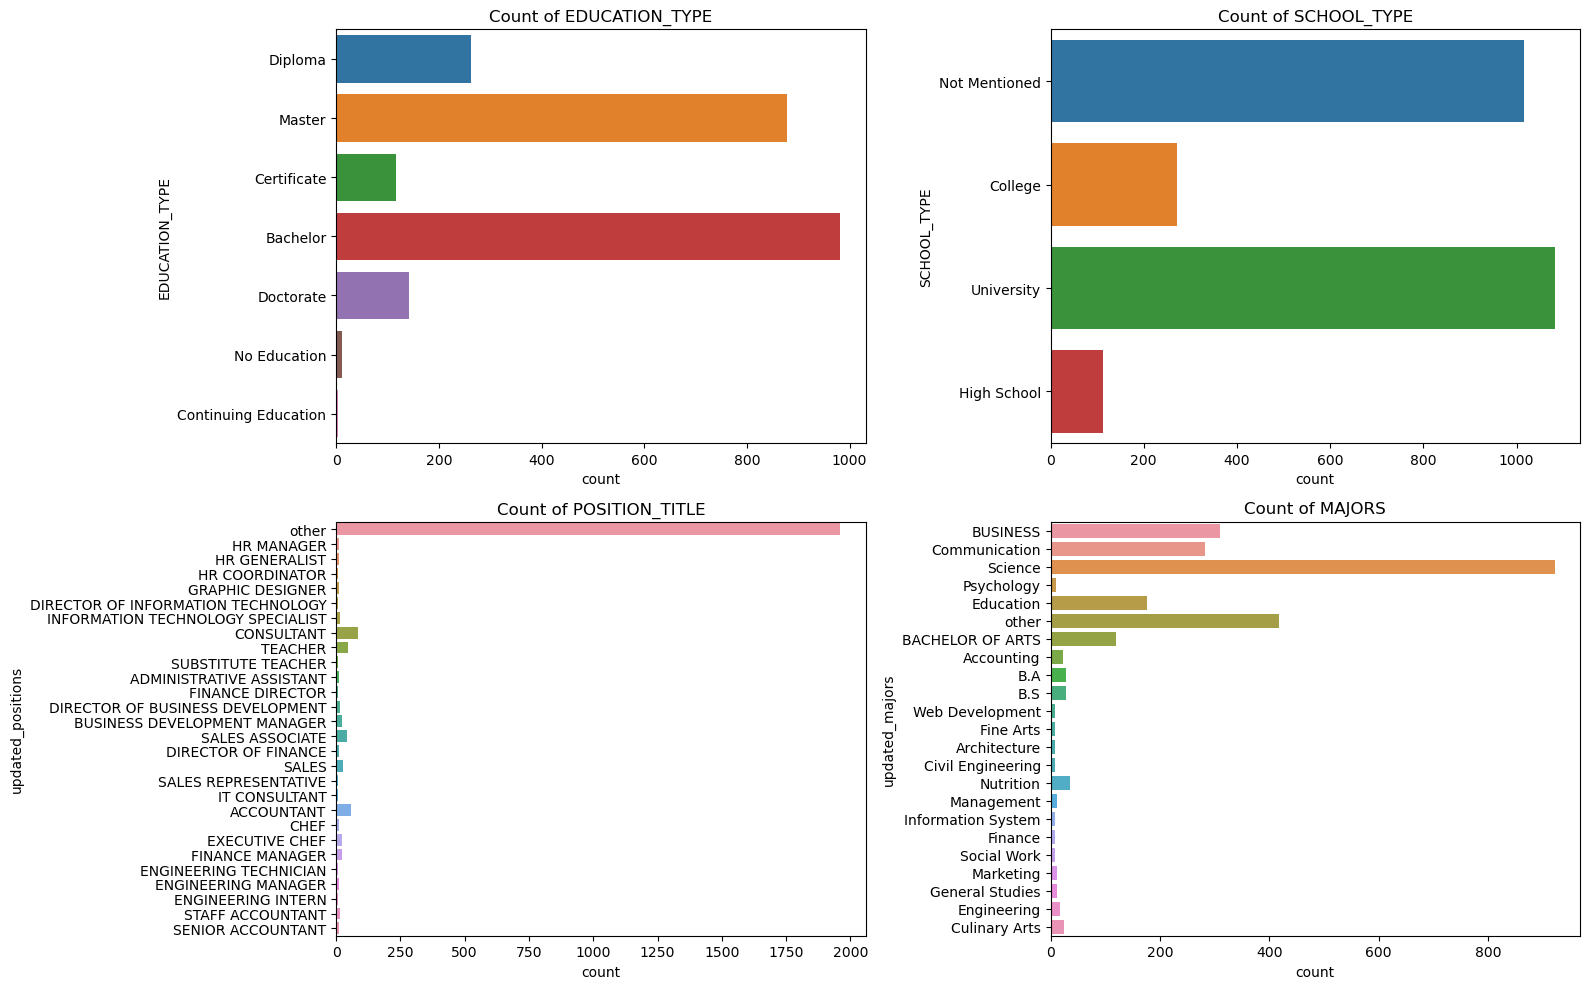

,AWARDS,COMMUNITY_SERVICE,VOLUNTEERING,DRIVING_LICENSE,EDUCATION_TYPE,SCHOOL_TYPE,updated_positions,updated_majors
count,2484,2484,2484,2484,2395,2484,2484,2484
unique,2,2,2,2,7,4,28,23
top,NO,NO,NO,NO,Bachelor,University,other,Science
freq,1852,2387,2457,2434,982,1082,1961,922


In [ ]:
### Write you code here ###
#note: use_univariate with catergircal
categorical_variables = pd.DataFrame({'AWARDS':df['AWARDS'],'COMMUNITY_SERVICE':df['COMMUNITY_SERVICE'],'VOLUNTEERING':df['VOLUNTEERING'],'DRIVING_LICENSE':df['DRIVING_LICENSE'],'EDUCATION_TYPE':df['EDUCATION_TYPE'],'SCHOOL_TYPE':df['SCHOOL_TYPE'],'updated_positions':df['updated_positions'],'updated_majors':df['updated_majors'],'LANGUAGES':df['LANGUAGES']})
description = categorical_variables.describe(include=['object'])

# Countplot for AWARDS, COMMUNITY_SERVICE, VOLUNTEERING, and DRIVING_LICENSE
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='AWARDS', data=categorical_variables)
plt.title('Count of AWARDS')

plt.subplot(2, 2, 2)
sns.countplot(x='COMMUNITY_SERVICE', data=categorical_variables)
plt.title('Count of COMMUNITY_SERVICE')

plt.subplot(2, 2, 3)
sns.countplot(x='VOLUNTEERING', data=categorical_variables)
plt.title('Count of VOLUNTEERING')

plt.subplot(2, 2, 4)
sns.countplot(x='DRIVING_LICENSE', data=categorical_variables)
plt.title('Count of DRIVING_LICENSE')

plt.tight_layout()
plt.show()

# Barplot for MAJOR, EDUCATION_TYPE, SCHOOL_TYPE, and POSITION_TITLE
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.countplot(y='EDUCATION_TYPE', data=categorical_variables)
plt.title('Count of EDUCATION_TYPE')

plt.subplot(2, 2, 2)
sns.countplot(y='SCHOOL_TYPE', data=categorical_variables)
plt.title('Count of SCHOOL_TYPE')

plt.subplot(2, 2, 3)
sns.countplot(y='updated_positions', data=categorical_variables)
plt.title('Count of POSITION_TITLE')

plt.subplot(2, 2, 4)
sns.countplot(y='updated_majors', data=categorical_variables)
plt.title('Count of MAJORS')

plt.tight_layout()
plt.show()

description

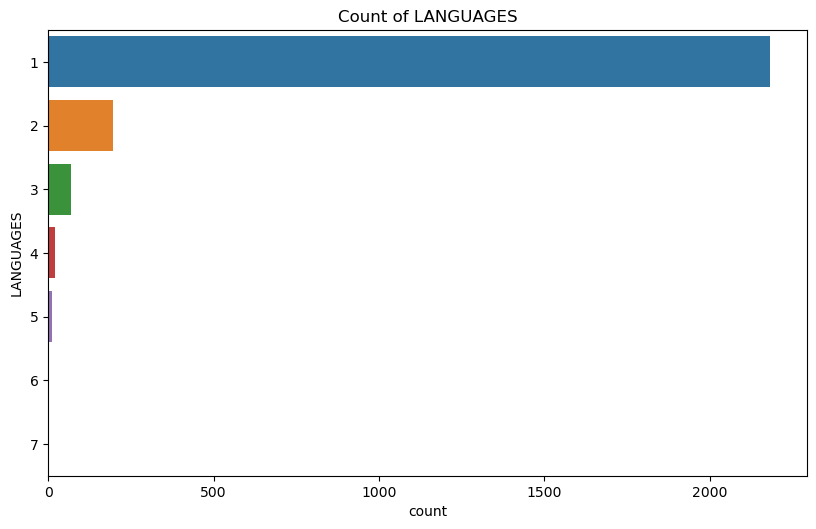

In [ ]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.countplot(y='LANGUAGES', data=categorical_variables)
plt.title('Count of LANGUAGES')

plt.tight_layout()
plt.show()

## Great Job.